#### Libraries

In [31]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

Let's read our new dataset

In [2]:
data = pd.read_csv('./Data/cosmetics_cleaned.csv')

In [3]:
data.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,...,"('yellow ', 13)","('zea mays oil', 7)","('zea mays starch', 15)","('zinc gluconate', 76)","('zinc oxide', 21)","('zinc oxide %water', 9)","('zinc pca', 19)","('zinc sulfate', 16)","('zingiber aromaticus extract', 7)","('zingiber officinale root extract', 40)"
0,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
data.info()

NameError: name 'data' is not defined

## 1. Univariate analysis

#### Numerical variables

We are creating df_numeric which will only contain the numerical variables

In [4]:
df_numeric = data[['Price', 'Rank', 'Harmful_Substances']]

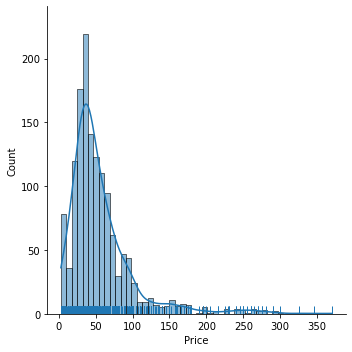

In [7]:
sns.displot(df_numeric['Price'], bins=50, kde=True, rug=True)

We have a right skewed distibution

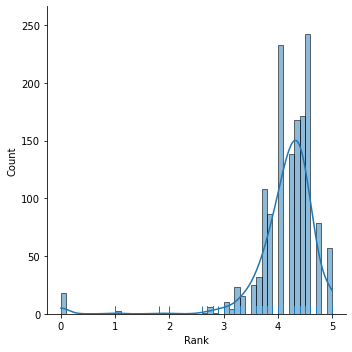

In [8]:
sns.displot(df_numeric['Rank'], bins=50, kde=True, rug=True)

We have a left skwed distribution.

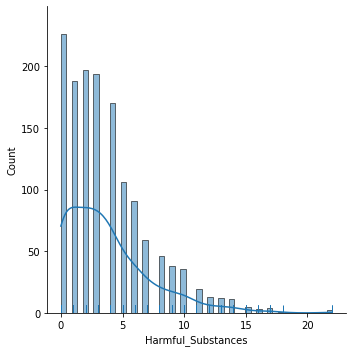

In [10]:
sns.displot(df_numeric['Harmful_Substances'], bins=50, kde=True, rug=True)

We have a right skwed distribution

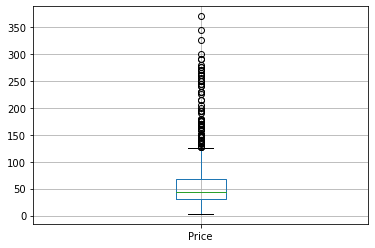

In [41]:
df_numeric.boxplot(column='Price')

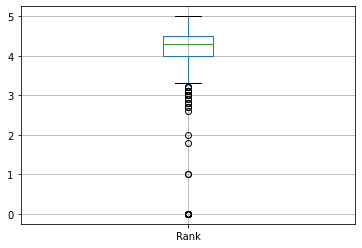

In [42]:
df_numeric.boxplot(column='Rank')

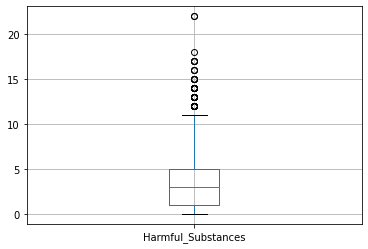

In [43]:
df_numeric.boxplot(column='Harmful_Substances')

#### Categorical variables

We are creating df_non_numeric which will only contain the categorical variables

In [17]:
columns_non_numeric = [column_name for column_name in data.columns if column_name not in ['Price', 'Rank', 'Harmful_Substances']]

In [19]:
df_non_numeric = data[columns_non_numeric]

Text(0.5, 1.0, 'Label distribution')

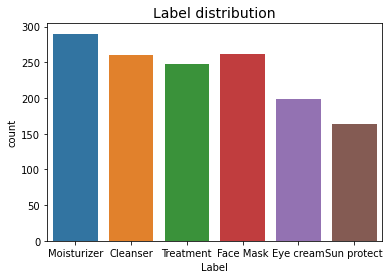

In [22]:
sns.countplot(x="Label",data=df_non_numeric)
plt.title('Label distribution', fontsize=14)

Without surprise, the type of product that comes out the most is the moisturizer. Sun protect is the type of product which comes out the less as it will be mostly used for sunny days in western countries.

Text(0.5, 1.0, 'Brand distribution')

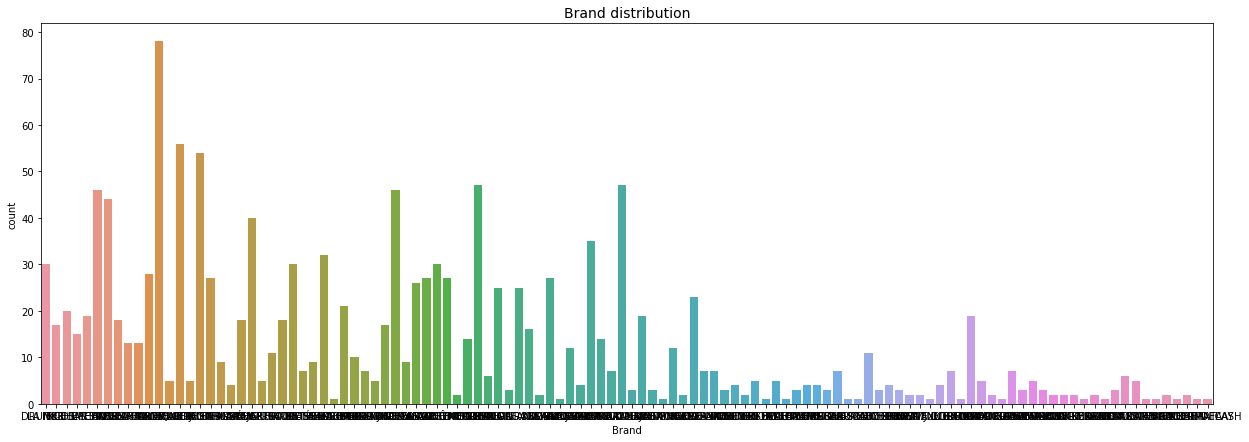

In [28]:
plt.figure(figsize=(21,7))
sns.countplot(x="Brand",data=df_non_numeric)
plt.title('Brand distribution', fontsize=14)

In [27]:
df_non_numeric['Brand'].value_counts()

CLINIQUE              78
SHISEIDO              56
ORIGINS               54
SEPHORA COLLECTION    47
MURAD                 47
                      ..
SAND & SKY             1
APIVITA                1
KAPLAN MD              1
URBAN DECAY            1
BLACK UP               1
Name: Brand, Length: 114, dtype: int64

As there are too many brands, the graph isn't readable. With a value_counts, we see that the top 3 brand that comes out the more often is Clinique, Shiseido and Origins.

In [37]:
# this plots multiple seaborn countplots on different subplots.

def plot_multiple_countplots(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,12))
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(x=df[col], ax=axs)
            else:
                sns.countplot(x=df[col], ax=axs[j])
        else:
            sns.countplot(x=df[col], ax=axs[i, j])

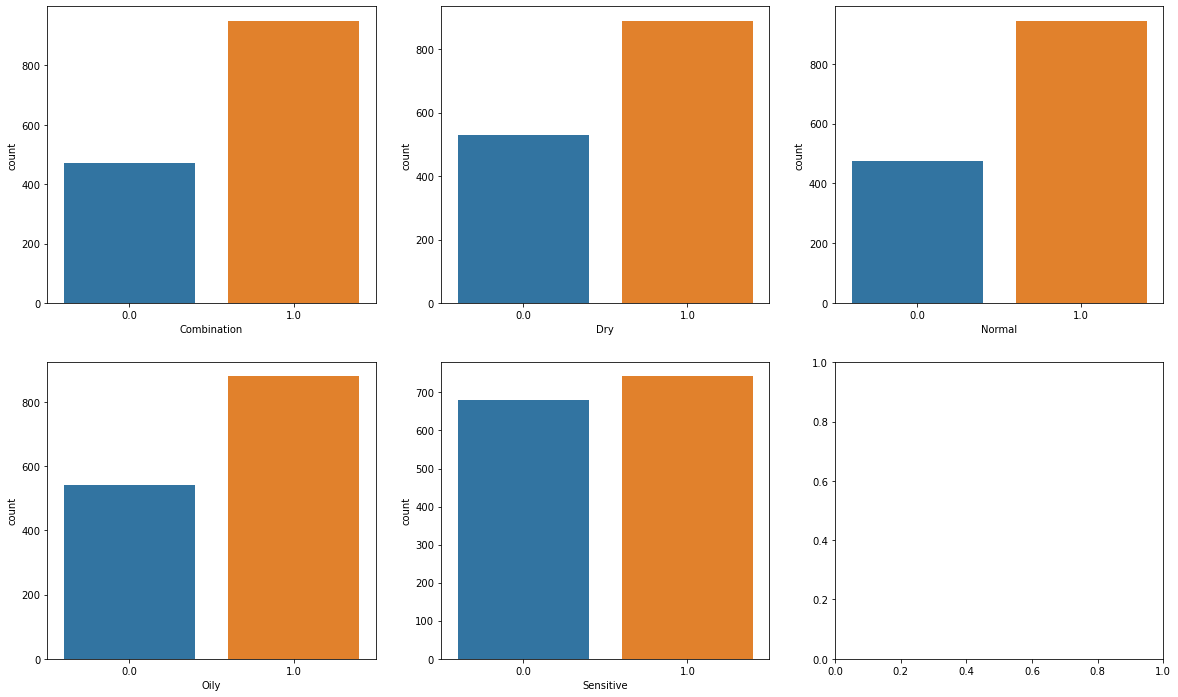

In [38]:
plot_multiple_countplots(df_non_numeric, ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive'])

There is pretty much the same amount of product for each type of skin types. Only the sensitive skin have less products associated.